<a href="https://colab.research.google.com/github/mmadyda/OpenCV/blob/master/OpenCV_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import matplotlib.pyplot as plt

In [28]:
x_train.shape

(60000, 28, 28)

In [0]:
single_image = x_train[0]

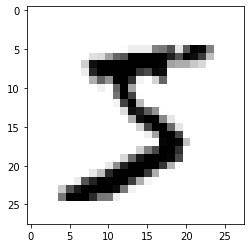

In [30]:
plt.imshow(single_image, cmap='gray_r')

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
y_train.shape

(60000,)

##one hot enconding

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [35]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [36]:
single_image.max()

255

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
scaled_image = x_train[0]

In [39]:
scaled_image.max()

1.0

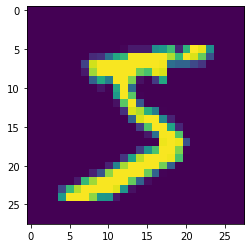

In [40]:
plt.imshow(scaled_image)

In [41]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000,28,28,1)

In [43]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
x_test = x_test.reshape(10000,28,28,1)

In [46]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [58]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 34s 569us/step - loss: 0.1399 - accuracy: 0.9582
Epoch 2/2
60000/60000 [==============================] - 34s 559us/step - loss: 0.0493 - accuracy: 0.9855


In [61]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 2s 154us/step


[0.0417896971575683, 0.9868000149726868]

In [0]:
from sklearn.metrics import classification_report

In [0]:
predictions = model.predict_classes(x_test)

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

